# Assignment 2

## Part A
Grayscale Histogram - load you image and then write a function gray_histogram. Details below :
#### Requirements:
 Function Signature : gray_histogram(gray_img)
- 1. Input is a non-normalized grayscale image (values 0–255)
- 2. Use pure NumPy loops
- 3. No OpenCV histogram functions allowed
Then plot using matplotlib.

RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )

In [1]:
import sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os



In [2]:
local_img_path = 'FLOWER.jpg'

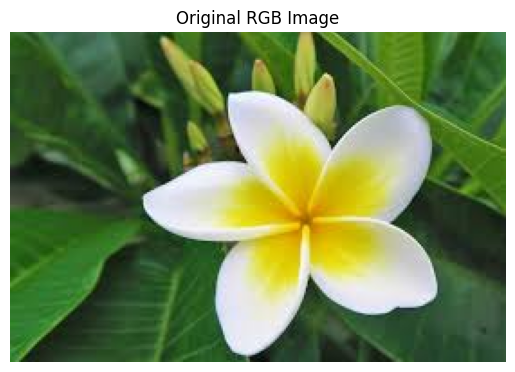

In [3]:
img_bgr = cv2.imread(local_img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

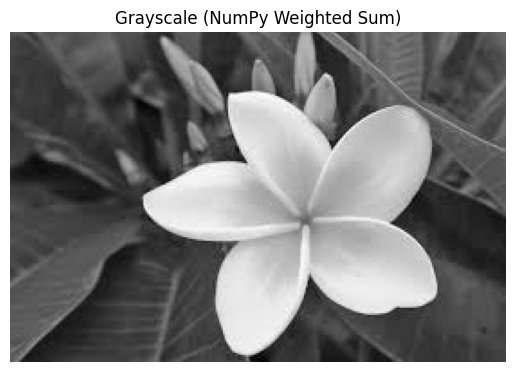

In [4]:
rgb_float = img_rgb.astype(np.float32)

# grayscale from scratch 
weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
gray_np = np.clip(np.dot(rgb_float, weights), 0, 255).astype('uint8')

 # Then we Convert back to uint8
gray = gray_np.astype(np.uint8)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale (NumPy Weighted Sum)")
plt.axis("off")
plt.show()

In [5]:
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)   

    # Count pixel occurrences
    for i in range(gray_img.shape[0]):  # Outer loop → rows
        for j in range(gray_img.shape[1]):  # Inner loop → columns
            pixel = gray_img[i, j]    # grayscale pixel Extracts the pixel value at row i, column j.
            hist[pixel] += 1

    return hist


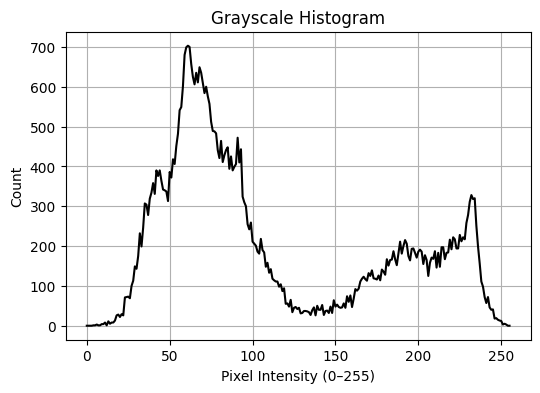

In [6]:
hist_gray = gray_histogram(gray_np)

plt.figure(figsize=(6,4))
plt.plot(hist_gray, color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [7]:
def rgb_histogram(img_rgb):
    # Separate channels
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]

    # Hist arrays
    hist_R = np.zeros(256, dtype=int)
    hist_G = np.zeros(256, dtype=int)
    hist_B = np.zeros(256, dtype=int)

    # Loop over each pixel
    rows, cols, _ = img_rgb.shape
    for i in range(rows):
        for j in range(cols):
            r = R[i, j]
            g = G[i, j]
            b = B[i, j]

            hist_R[r] += 1
            hist_G[g] += 1
            hist_B[b] += 1

    return hist_R, hist_G, hist_B


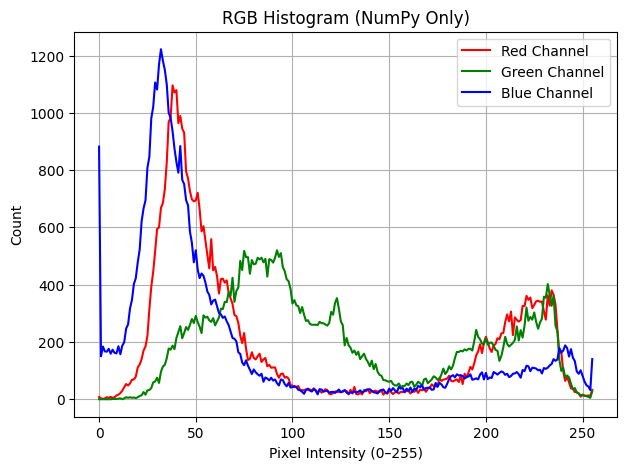

In [8]:
hist_R, hist_G, hist_B = rgb_histogram(img_rgb)

plt.figure(figsize=(7,5))
plt.plot(hist_R, color='red', label='Red Channel')
plt.plot(hist_G, color='green', label='Green Channel')
plt.plot(hist_B, color='blue', label='Blue Channel')

plt.title("RGB Histogram (NumPy Only)")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()



## Part B 
##### RGB to HSV ( only Numpy ofc ) Write a function rgb_to_hsv that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ). Note : Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that ) The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc. Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [9]:

# EASY RGB → HSV With numpy only

def rgb_to_hsv_easy(rgb):
    rgb = rgb.astype(np.float32)

    R = rgb[..., 0]
    G = rgb[..., 1]
    B = rgb[..., 2]

    #  Value 
    Cmax = np.maximum(np.maximum(R, G), B)
    Cmin = np.minimum(np.minimum(R, G), B)
    delta = Cmax - Cmin

    #  Saturation 
    S = np.zeros_like(Cmax)
    mask = Cmax != 0
    S[mask] = delta[mask] / Cmax[mask]     

    #  Hue 
    H = np.zeros_like(Cmax)

    # Red max
    mask_r = (Cmax == R) & (delta != 0)
    H[mask_r] = (60 * ((G[mask_r] - B[mask_r]) / delta[mask_r])) % 360

    # Green max
    mask_g = (Cmax == G) & (delta != 0)
    H[mask_g] = (60 * ((B[mask_g] - R[mask_g]) / delta[mask_g]) + 120) % 360

    # Blue max
    mask_b = (Cmax == B) & (delta != 0)
    H[mask_b] = (60 * ((R[mask_b] - G[mask_b]) / delta[mask_b]) + 240) % 360

    #  Convert to OpenCV ranges 
    H_cv = (H / 2).clip(0, 179).astype(np.uint8)
    S_cv = (S * 255).clip(0, 255).astype(np.uint8)
    V_cv = Cmax.clip(0, 255).astype(np.uint8)

    hsv = np.stack([H_cv, S_cv, V_cv], axis=-1)

    return hsv


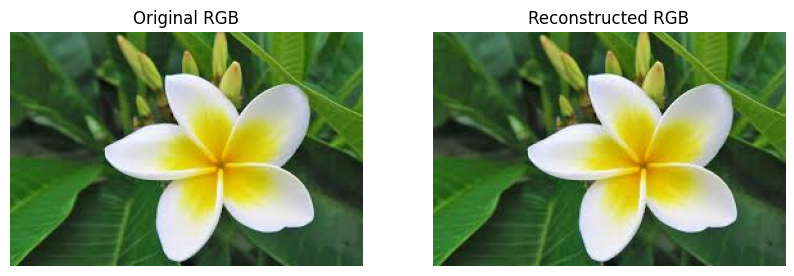

If both images look same then our HSV conversion is correct


In [10]:


# Convert back using cv2.cvtColor

def test_rgb_to_hsv(image_path):
    img = np.array(Image.open(image_path).convert("RGB"))

    # convert using our function
    hsv = rgb_to_hsv_easy(img)

    # convert back to RGB using OpenCV 
    rgb_back = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Results
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original RGB")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(rgb_back)
    plt.title("Reconstructed RGB")
    plt.axis("off")

    plt.show()

    print("If both images look same then our HSV conversion is correct")


# RUN THE TEST
test_rgb_to_hsv("FLOWER.jpg")  

### PART C

Create 2 filters.
- Give them any name of your choice 
- Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
- Comment your code showing where you implemented what part of your filter
- The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
- Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )
* IMPORTANT FILTER DESIGN NOTES :

* The filter must include at least two color modifications, such as:

1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing
10. Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:

why you chose those modifications
why they suit the image


In [11]:

def Too_Much_Effort_Filter(img_rgb):
    img = img_rgb.astype(np.float32)

    
    img = img + 25         # gentle brightening
    img = np.clip(img, 0, 255)

    
    img[:, :, 2] += 12    # Red channel
    img[:, :, 0] -=  4    # Blue channel
    img = np.clip(img, 0, 255)

    
    #  Boost saturation (use HSV)
    hsv = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)

    # Increase saturation by +30%
    hsv[:, :, 1] *= 1.30
    hsv[:, :, 1] = np.clip(hsv[:, :, 1], 0, 255)

    
    # Increase overall value slightly 
    hsv[:, :, 2] *= 1.10
    hsv[:, :, 2] = np.clip(hsv[:, :, 2], 0, 255)

    
    #  Back to RGB
    final_img = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    
    #  Sharpening
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])         # simple sharpening kernel
    
    sharp_img = cv2.filter2D(final_img, -1, kernel)

    return sharp_img


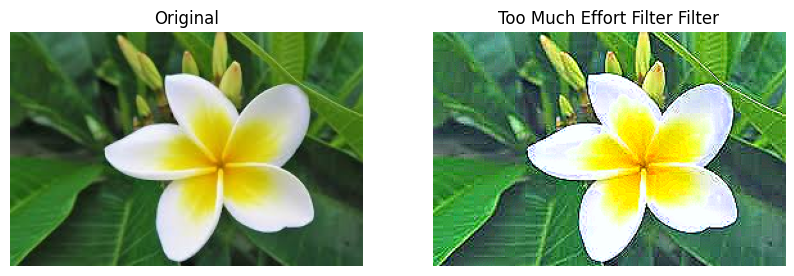

In [12]:

result1 = Too_Much_Effort_Filter(img_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result1)
plt.title("Too Much Effort Filter Filter")
plt.axis("off")
plt.show()


In [13]:
def Pollution_Level_Delhi_Mode(img_rgb):
    img = img_rgb.astype(np.float32)

    # 1. Lower contrast: blend image with gray
    gray_level = 180
    img = 0.7 * img + 0.3 * gray_level

    # 2. Slight desaturation (-20%)
    hsv = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:, :, 1] *= 0.80
    hsv[:, :, 1] = np.clip(hsv[:, :, 1], 0, 255)

    # 3. Blue-gray fog tint
    img2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)
    img2[:, :, 0] += 20   # Blue
    img2[:, :, 1] += 10   # Green

    # 4. Gamma correction 
    gamma = 0.8
    img_norm = img2 / 255.0
    img_gamma = np.power(img_norm, gamma) * 255

    final_img = np.clip(img_gamma, 0, 255).astype(np.uint8)
    return final_img

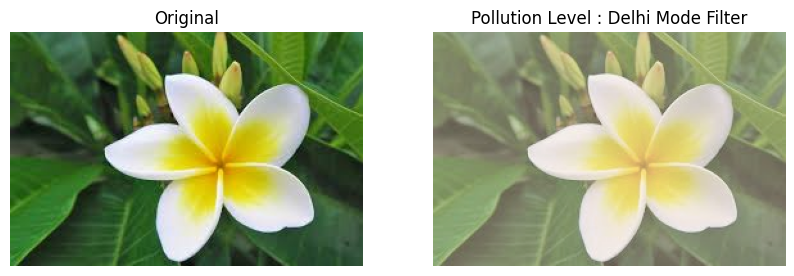

In [14]:
result2 = Pollution_Level_Delhi_Mode(img_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result2)
plt.title("Pollution Level : Delhi Mode Filter")
plt.axis("off")

plt.show()


## PART-D
White Balance Function
- Write a function white_patch_balance(img_rgb) that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [15]:

def white_patch_balance(img_rgb):
    
    # Ensure numpy array and float for safe scaling
    img = np.asarray(img_rgb).astype(np.float32)  # shape (H, W, 3)

    max_per_channel = img.reshape(-1, 3).max(axis=0)  # array([maxR, maxG, maxB])
    
    max_per_channel = np.where(max_per_channel == 0, 1.0, max_per_channel)

    scale = 255.0 / max_per_channel  # shape (3,)

    #    Multiply each channel by its scale factor
    balanced = img * scale[np.newaxis, np.newaxis, :]  

    # Clip to valid range and convert to uint8
    balanced = np.clip(np.round(balanced), 0, 255).astype(np.uint8)

    return balanced

# Helper to display images side-by-side
def show_side_by_side(img1, img2, title1="Original", title2="White-patch Balanced"):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")

    plt.tight_layout()
    plt.show(block=True)




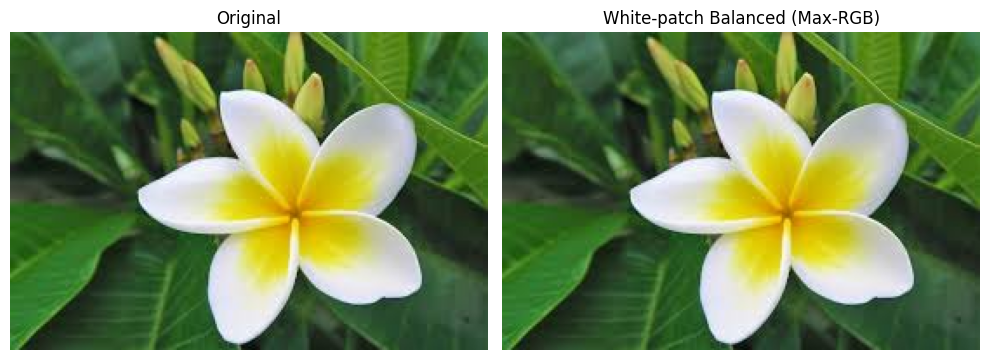

In [16]:

if __name__ == "__main__":
    # CHANGE this path to Our image filename 
    image_path = "FLOWER.jpg"  

    if not os.path.exists(image_path):
        print("Image not found:", image_path)
    else:
        pil = Image.open(image_path).convert("RGB")
        rgb = np.asarray(pil)  # uint8 

        balanced = white_patch_balance(rgb)

        
        show_side_by_side(rgb, balanced,
                          title1="Original",
                          title2="White-patch Balanced (Max-RGB)")
        
